In [2]:
dataset_name = "dataset-2024-06-12_12-33-29"

In [61]:
from src.tools import check_file_path,filename_to_timestamp
import os 
import numpy as np
from tqdm import tqdm
import multiprocessing
selected_names=[
    "grass",
    "sidewalk",
    "road",
    "floor",
    "earth",
    "path",
   
]

id_to_label_name = {
  "0": "wall",
  "1": "building",
  "2": "sky",
  "3": "floor",
  "4": "tree",
  "5": "ceiling",
  "6": "road",
  "7": "bed ",
  "8": "windowpane",
  "9": "grass",
  "10": "cabinet",
  "11": "sidewalk",
  "12": "person",
  "13": "earth",
  "14": "door",
  "15": "table",
  "16": "mountain",
  "17": "plant",
  "18": "curtain",
  "19": "chair",
  "20": "car",
  "21": "water",
  "22": "painting",
  "23": "sofa",
  "24": "shelf",
  "25": "house",
  "26": "sea",
  "27": "mirror",
  "28": "rug",
  "29": "field",
  "30": "armchair",
  "31": "seat",
  "32": "fence",
  "33": "desk",
  "34": "rock",
  "35": "wardrobe",
  "36": "lamp",
  "37": "bathtub",
  "38": "railing",
  "39": "cushion",
  "40": "base",
  "41": "box",
  "42": "column",
  "43": "signboard",
  "44": "chest of drawers",
  "45": "counter",
  "46": "sand",
  "47": "sink",
  "48": "skyscraper",
  "49": "fireplace",
  "50": "refrigerator",
  "51": "grandstand",
  "52": "path",
  "53": "stairs",
  "54": "runway",
  "55": "case",
  "56": "pool table",
  "57": "pillow",
  "58": "screen door",
  "59": "stairway",
  "60": "river",
  "61": "bridge",
  "62": "bookcase",
  "63": "blind",
  "64": "coffee table",
  "65": "toilet",
  "66": "flower",
  "67": "book",
  "68": "hill",
  "69": "bench",
  "70": "countertop",
  "71": "stove",
  "72": "palm",
  "73": "kitchen island",
  "74": "computer",
  "75": "swivel chair",
  "76": "boat",
  "77": "bar",
  "78": "arcade machine",
  "79": "hovel",
  "80": "bus",
  "81": "towel",
  "82": "light",
  "83": "truck",
  "84": "tower",
  "85": "chandelier",
  "86": "awning",
  "87": "streetlight",
  "88": "booth",
  "89": "television receiver",
  "90": "airplane",
  "91": "dirt track",
  "92": "apparel",
  "93": "pole",
  "94": "land",
  "95": "bannister",
  "96": "escalator",
  "97": "ottoman",
  "98": "bottle",
  "99": "buffet",
  "100": "poster",
  "101": "stage",
  "102": "van",
  "103": "ship",
  "104": "fountain",
  "105": "conveyer belt",
  "106": "canopy",
  "107": "washer",
  "108": "plaything",
  "109": "swimming pool",
  "110": "stool",
  "111": "barrel",
  "112": "basket",
  "113": "waterfall",
  "114": "tent",
  "115": "bag",
  "116": "minibike",
  "117": "cradle",
  "118": "oven",
  "119": "ball",
  "120": "food",
  "121": "step",
  "122": "tank",
  "123": "trade name",
  "124": "microwave",
  "125": "pot",
  "126": "animal",
  "127": "bicycle",
  "128": "lake",
  "129": "dishwasher",
  "130": "screen",
  "131": "blanket",
  "132": "sculpture",
  "133": "hood",
  "134": "sconce",
  "135": "vase",
  "136": "traffic light",
  "137": "tray",
  "138": "ashcan",
  "139": "fan",
  "140": "pier",
  "141": "crt screen",
  "142": "plate",
  "143": "monitor",
  "144": "bulletin board",
  "145": "shower",
  "146": "radiator",
  "147": "glass",
  "148": "clock",
  "149": "flag"
}

selected_ids = [int(key) for key, value in id_to_label_name.items() if value in selected_names]
cot_no_traversable = 2

dataset_folder = check_file_path(f"datasets",dataset_name,"train")

bins = np.linspace(0, cot_no_traversable, 150)

counts = np.zeros(len(bins)-1)
counts_class = np.zeros((len(selected_names),len(bins)-1))

def process_file(file):
    timestamp = filename_to_timestamp(file)
    rgb = check_file_path(dataset_folder,"rgb",timestamp+".jpg")
    confidence = np.load(check_file_path(dataset_folder,"confidence",timestamp+".npy"))
    mask_path = check_file_path(dataset_folder,"mask",file)
    segmentation = np.load(check_file_path(dataset_folder,"segmentation",timestamp+".npy"))
    mask = np.load(mask_path)

    mask[np.logical_and(confidence<0.5,mask==0)] = cot_no_traversable
    for i,bin in enumerate(bins[:-1]):
        select = np.logical_and(mask>bin,mask<=bins[i+1])
        counts[i] += np.sum(select) 
        for j in range(len(selected_names)):
            select_class = np.logical_and(segmentation==selected_ids[j],select)
            counts_class[j,i] += np.sum(select_class)
    return counts,counts_class
# multip
pool = multiprocessing.Pool(multiprocessing.cpu_count())
dataset_folder_mask = check_file_path(dataset_folder,'mask')
for counts_2,counts_class_2 in tqdm(pool.imap_unordered(process_file,os.listdir(dataset_folder_mask)),total=len(os.listdir(dataset_folder_mask))):
    counts+=counts_2
    counts_class+=counts_class_2
# for file in tqdm(os.listdir(check_file_path(dataset_folder,"mask"))):
#     timestamp = filename_to_timestamp(file)
#     rgb = check_file_path(dataset_folder,"rgb",timestamp+".jpg")
#     confidence = np.load(check_file_path(dataset_folder,"confidence",timestamp+".npy"))
#     mask_path = check_file_path(dataset_folder,"mask",file)
#     segmentation = np.load(check_file_path(dataset_folder,"segmentation",timestamp+".npy"))
#     mask = np.load(mask_path)

#     mask[np.logical_and(confidence<0.5,mask==0)] = cot_no_traversable
#     for i,bin in enumerate(bins[:-1]):
#         select = np.logical_and(mask>bin,mask<=bins[i+1])
#         counts[i] += np.sum(select) 
#         for j in range(len(selected_names)):
#             select_class = np.logical_and(segmentation==selected_ids[j],select)
#             counts_class[j,i] += np.sum(select_class)
    

100%|██████████| 594/594 [00:26<00:00, 22.05it/s]


Mean of class grass 1.189492376747204
Mean of class sidewalk 0.9833007100977015
Mean of class road 1.0206470170292339
Mean of class floor 0.9982848932741588
Mean of class earth 0.9982987198692287
Mean of class path 1.1180788824107608


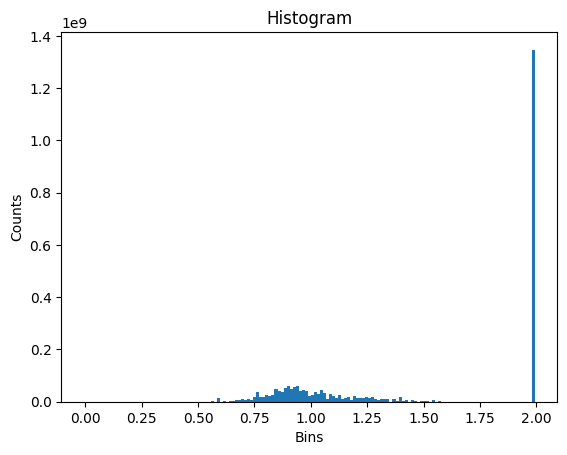

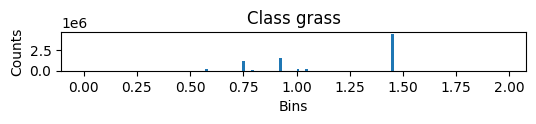

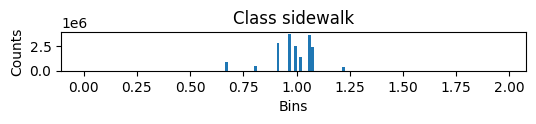

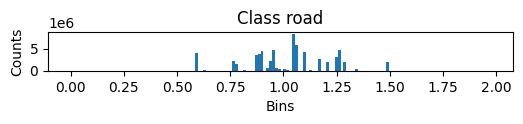

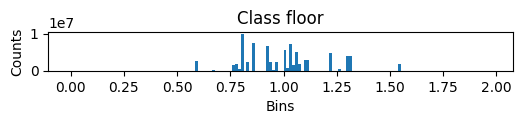

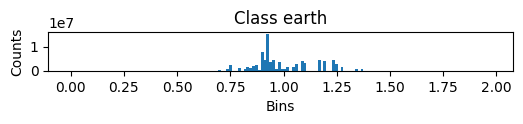

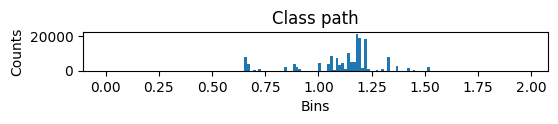

In [62]:
import matplotlib.pyplot as plt
# compute average cot of each class
for i in range(len(selected_names)):
    #compute mean
    mean = np.sum(counts_class[i][:-1]/np.sum(counts_class[i][:-1]) * bins[:-2])
    print("Mean of class",selected_names[i],mean)

plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram')
plt.show()

for i in range(len(selected_names)):
    # change height of figure
    plt.figure(figsize=(6,0.5))
    plt.bar(bins[:-2], counts_class[i][:-1], width=(bins[1]-bins[0]))
    
    plt.xlabel('Bins')
    plt.ylabel('Counts')
    plt.title(f'Class {selected_names[i]}')
    plt.show()

In [ ]:
def gaussian_kernel():
    